In [1]:
from climada_petals.hazard.drought import Drought

from climada_petals.entity.impact_funcs.drought import ImpfDrought
# from climada.entity import Entity
from climada.entity import ImpactFuncSet
from climada.engine import Impact
from climada_petals.entity.exposures.spam_agrar import SpamAgrar
import numpy as np

## hazard

In [2]:
"""Set Area to be analysed"""


"""Set method for defining intensity between 1 (default): min 2:sum-threshold 3:sum"""
intensity_definition = 3

"""Initialize default threshold (default: -1)"""
threshold = -1.5

#Threshold and intensity_definition to be defined only if not defalut values are used

"""To define only if no default data are used (spei06)"""
#spei_file_dir = r'C:\Users\veron\Documents\ETH\HS18\PROJECT\GIT\climada_python\data\system'
#spei_file_name = r'spei02.nc'
#spei_file_url = r'http://digital.csic.es/bitstream/10261/153475/4'

"""To define if the data are not in default path \climada_python\data\system"""
#file_path_spei = r'C:\Users\veron\Documents\ETH\HS18\PROJECT\GIT\climada_python\data\system\spei06.nc'



'To define if the data are not in default path \\climada_python\\data\\system'

In [3]:
"""Initialize hazard Drought"""
d = Drought()

"""Set area in latitudinal longitudinal coordinates"""
#d.set_area(latmin, lonmin, latmax, lonmax)
d.set_area(-11.745695,21.838949 , 23.145147, 51.415695)
#21.838949 	-11.745695 	51.415695 	23.145147
"""Set if non default parameters are used"""
d.set_threshold(threshold)
d.set_intensity_def(intensity_definition)

"""Set link to download data if a non default data is needed (default: spei06)"""
#d.set_file_name(spei_file_name)
#d.set_file_url(spei_file_url)

"""Set path if the data are not in 'climada_python\data\system'"""
#d.set_file_path(file_path_spei)

"""Setup the hazard"""
new_haz = d.setup()

## impact function 

In [4]:
"""Initialize Impact function"""
dr_impf = ImpactFuncSet()
impf_def = ImpfDrought.from_default_sum()
"""set impact function: for min: set_default; for sum-thr: set_default_sumthr; for sum: set_default_sum"""
#impf_def.set_default()
#impf_def.set_default_sumthr()

dr_impf.append(impf_def)

In [30]:
#dr_impf[0].plot()
impf_def.name

'drought default sum'

In [87]:
dmdd=np.array(impf_def.mdd) 
dpaa=np.array(impf_def.paa)
dint=np.array(impf_def.intensity)

#impf_def.mdd * impf_def.paa * 100
len(dmdd),len(dpaa),len(dint)

print(dmdd)
print(dpaa)
print(dint)
#dmdd=np.array([1.0, 0.65, 0.5, 0.3, 0., 0.])
#dpaa=np.array([1.0, 1.0, 1.0, 1.0, 0.0, 0.0])
#dint=np.array([-15.0, -12.0, -9.0, -7.0, -5.0, 0.0])
#dmdd * dpaa * 100
#np.multiply(dmdd * dpaa)


[1.   0.65 0.5  0.3  0.   0.  ]
[1 1 1 1 0 0]
[-15 -12  -9  -7  -5   0]


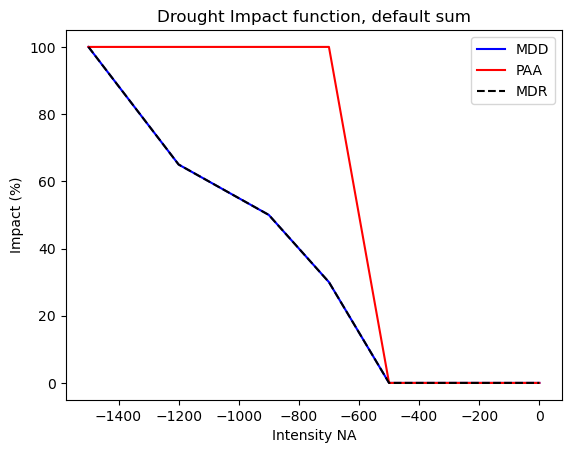

In [89]:
 _, axis = plt.subplots(1, 1)

title = 'Drought Impact function, default sum'
#if self.name != str(self.id):
#    title += ': %s' % self.name
axis.set_xlabel('Intensity NA')
axis.set_ylabel('Impact (%)')
axis.set_title(title)
#axis.plot(impf_def.intensity, impf_def.mdd * 100, 'b', label='MDD')
axis.plot(dint*100, dmdd * 100, 'b', label='MDD')
axis.plot(dint*100, dpaa * 100, 'r', label='PAA')
axis.plot(dint*100, dmdd * dpaa * 100, 'k--', label='MDR')

#axis.set_xlim((dint.min(), dint.max()))

#MDD- Mean damage (impact) degree for each intensity (numbers in [0,1])
#PAA- Percentage of affected assets (exposures) for each intensity (numbers in [0,1])
#MDR- The mean damage ratio
axis.legend()

## exposure

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DHXBJX
        
documenation 
https://climada-petals.readthedocs.io/en/latest/climada_petals/climada_petals.entity.exposures.html#module-climada_petals.entity.exposures.spam_agrar

In [90]:
exposure_agrar = SpamAgrar()
exposure_agrar.init_spam_agrar()

"""If intensity def is not default, exposure has to be adapted"""
"""In case of sum-thr: 'impf_DR_sumthr', in case of sum:'impf_DR_sum'"""
#exposure_agrar['impf_DR_sumthr'] = np.ones(exposure_agrar.shape[0])
exposure_agrar.gdf['impf_DR_sum'] = np.ones(exposure_agrar.gdf.shape[0])
#21.838949 	-11.745695 	51.415695 	23.145147
ea_exposure = exposure_agrar.gdf.cx[21.83894:51.415695, -11.745695:23.145147]

In [96]:
#exposure_agrar.gdf
#ea_exposure
wd2=ea_exposure[['value','latitude','longitude','region_id']]
wd2.to_csv('/home/ea_agr_spam.csv',index=False)

In [97]:
from matplotlib import colors
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

norm = colors.LogNorm(vmin=500, vmax=4.0e8)

#ax=ea_exposure.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

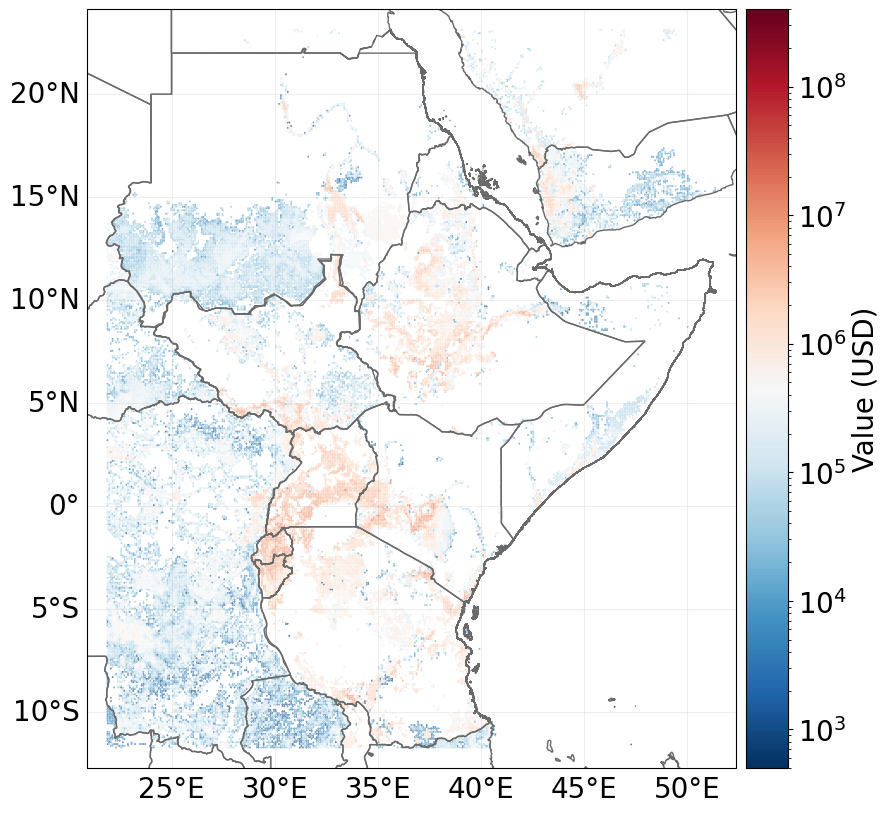

In [99]:
from climada.entity import Exposures

import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
#from Configuration import *
import os
import pandas as pd

import cartopy.crs as ccrs

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#file_path = lp_csv_files[5] # define the full file path of the CSV-file

file_path='/home/ea_agr_spam.csv'


#file_path='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/KEN_2021.csv'
new_exp = Exposures(pd.read_csv(file_path))
new_exp.check()

norm = colors.LogNorm(vmin=500, vmax=4.0e8)

ax=new_exp.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

#fname='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_ibf_data_resources/exposure-data/gis/ea_global_background.shp'

#ax.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')

plt.savefig('/home/ea_agr_spam.png', bbox_inches='tight')


## Impact 

In [6]:
imp_drought = Impact()

"""Calculate Damage for a specific event"""
imp_drought.calc(exposure_agrar, dr_impf, new_haz)

2022-09-21 05:37:45,650 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2022-09-21 05:37:46,390 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 705325 coordinates.


In [21]:
index_event_start = imp_drought.event_name.index('2014')
damages_drought = np.asarray([imp_drought.at_event[index_event_start]])
print(damages_drought)

[19040868.40760282]


In [101]:
#imp_drought.plot_scatter_eai_exposure()

imp_drought.write_csv('/home/drought_impact.csv')

In [130]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point

db=pd.read_csv('/home/drought_impact.csv')

geometry = [Point(xy) for xy in zip(db.exp_lon, db.exp_lat)]
#df = df.drop(['Lon', 'Lat'], axis=1)
igdf = gp.GeoDataFrame(db, crs="EPSG:4326", geometry=geometry)

ea_igdf = igdf.cx[21.83894:51.415695, -11.745695:23.145147]


/tmp/ipykernel_46/2958472405.py:5: DtypeWarning: Columns (0,1,2,3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  db=pd.read_csv('/home/drought_impact.csv')


In [133]:
#
#ea_igdf.to_csv('/home/ea_drought_impact.csv')
#ea_igdf.info()

ea_igdf['exp_crs'].loc[ea_igdf['exp_crs'].index[0]] = 'EPSG:4326'
#ea_igdf = ea_igdf.drop(['geometry'], axis=1)
ea_igdf.info()
ea_igdf.to_csv('/home/ea_drought_impact.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40807 entries, 393171 to 625645
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tag_hazard       0 non-null      object 
 1   tag_exposure     0 non-null      object 
 2   tag_impact_func  0 non-null      object 
 3   unit             0 non-null      object 
 4   tot_value        0 non-null      float64
 5   aai_agg          0 non-null      float64
 6   event_id         0 non-null      float64
 7   event_name       0 non-null      float64
 8   event_date       0 non-null      float64
 9   event_frequency  0 non-null      float64
 10  at_event         0 non-null      float64
 11  eai_exp          40807 non-null  float64
 12  exp_lat          40807 non-null  float64
 13  exp_lon          40807 non-null  float64
 14  exp_crs          1 non-null      object 
dtypes: float64(10), object(5)
memory usage: 6.0+ MB


In [134]:
from climada.engine import Impact

#df=pd.read_csv('/home/drought_impact.csv')
#ea_imp=Impact(df,event_id=[])

ea_imp=Impact.from_csv('/home/ea_drought_impact.csv')
#df.exp_crs.values[0]

/home/climada_python/climada/engine/impact.py:892: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

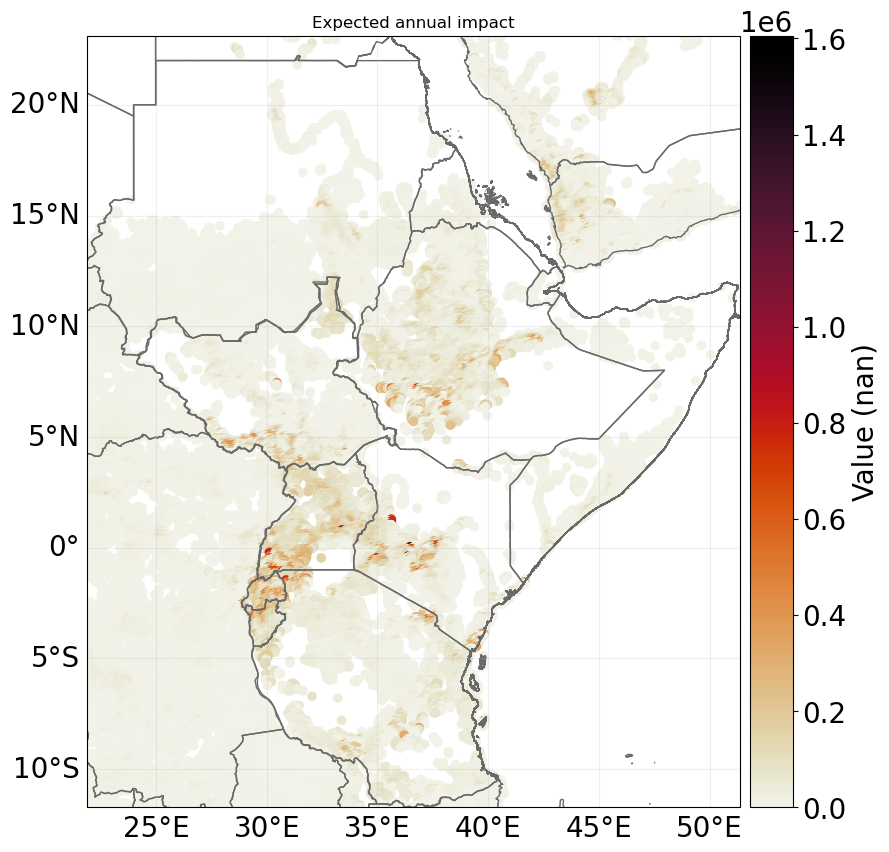

In [137]:
ea_imp.plot_scatter_eai_exposure(pop_name=False)